In [1]:
import scipy.io
import pandas as pd
import numpy as np
from math import exp
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('data_2_2b.mat') 
mat1 = scipy.io.loadmat('data_2_2c.mat') 
train_x = pd.DataFrame(mat['X_trn']) 
train1_x = train_x.to_numpy()

In [3]:
train_x1 = pd.DataFrame(mat1['X_trn']) 
train1_x1 = train_x1.to_numpy()

In [4]:
train_y = pd.DataFrame(mat['Y_trn']) 
train1_y = train_y.to_numpy()

In [14]:
train_y1 = pd.DataFrame(mat1['Y_trn']) 
train1_y1 = train_y1.to_numpy()

In [5]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

In [6]:
def loss(y, y_hat):
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat)) 
  return loss

In [7]:
def gradients(X, y, y_hat):
  # m-> number of training examples.
  m = X.shape[0]
  # Gradient of loss w.r.t weights.
  dw = (1/m)*np.dot(X.T, (y_hat - y)) 
  # Gradient of loss w.r.t bias.
  db = (1/m)*np.sum((y_hat - y))
  return dw, db

In [8]:
def normalize(X):
  m, n = X.shape
    # Normalizing all the n features of X.
  for i in range(n):
    X = (X - X.mean(axis=0))/X.std(axis=0)
  return X

In [9]:
def train(X, y, bs, epochs, lr):
  m, n = X.shape
  # Initializing weights and bias to zeros.
  w = np.zeros((n,1)) 
  b=0
  # Reshaping y.
  y = y.reshape(m,1)
  # Normalizing the inputs.
  x = normalize(X)
  # Empty list to store losses.
  losses = []
  # Training loop.
  for epoch in range(epochs):
    for i in range((m-1)//bs + 1):
      # Defining batches SGD
      start_i = i*bs
      end_i = start_i + bs 
      xb = X[start_i:end_i] 
      yb = y[start_i:end_i]
      # Calculating hypothesis/prediction.
      y_hat = sigmoid(np.dot(xb, w) + b)
      # Getting the gradients of loss w.r.t parameters.
      dw, db = gradients(xb, yb, y_hat)
      # Updating the parameters.
      w -= lr*dw 
      b -= lr*db
    # Calculating loss and appending it in the list.
    l = loss(y, sigmoid(np.dot(X, w) + b)) 
    losses.append(l)
  # returning weights, bias and losses(List).
  return w, b, losses

In [10]:
def predict(X):
  # X --> Input.
  # Normalizing the inputs.
  x = normalize(X)
  # Calculating presictions/y_hat.
  preds = sigmoid(np.dot(X, w) + b)
  # Empty List to store predictions.
  pred_class = []
  # if y_hat >= 0.5 --> round up to 1 
  # if y_hat < 0.5 --> round up to 1
  pred_class = [1 if i > 0.5 else 0 for i in preds]
  return np.array(pred_class)

In [11]:
def plot_decision_boundary(X, w, b,Y):
  x1 = [min(X[:,0]), max(X[:,0])] 
  m = -w[0]/w[1]
  c = -b/w[1]
  x2 = m*x1 + c
  plt.plot(x1, x2, 'y-') 
  plt.scatter(X[:,0], X[:,1], c = Y)

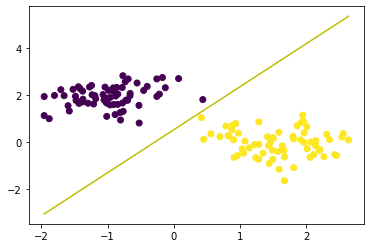

In [12]:
# Training
w, b, l = train(train1_x, train1_y, bs=10, epochs=1000, lr=0.01) 
# Plotting Decision Boundary
plot_decision_boundary(train1_x, w, b,train1_y)

In [13]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0,n_informative=2, random_state=1, n_clusters_per_class=1)

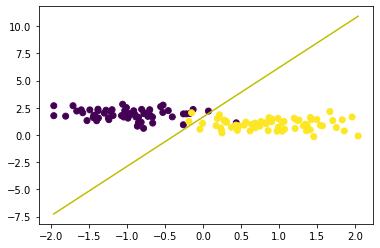

In [15]:
# Training
w, b, l = train(train1_x1, train1_y1, bs=10, epochs=1000, lr=0.01) 
# Plotting Decision Boundary
plot_decision_boundary(train1_x1, w, b,train1_y1)